In [7]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html#networkx.algorithms.community.modularity_max.greedy_modularity_communities
G = nx.karate_club_graph()
c = nx.community.greedy_modularity_communities(G)
sorted(c[0])
# [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

In [12]:
c

[frozenset({8,
            14,
            15,
            18,
            20,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33}),
 frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}),
 frozenset({0, 4, 5, 6, 10, 11, 16, 19})]

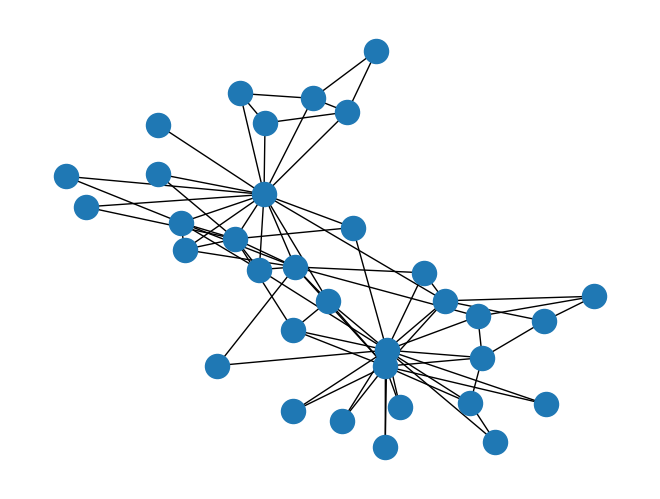

In [11]:
nx.draw(G)

In [13]:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html
G = nx.path_graph(10)
comp = nx.community.girvan_newman(G)
tuple(sorted(c) for c in next(comp))
# ([0, 1, 2, 3, 4], [5, 6, 7, 8, 9])

([0, 1, 2, 3, 4], [5, 6, 7, 8, 9])

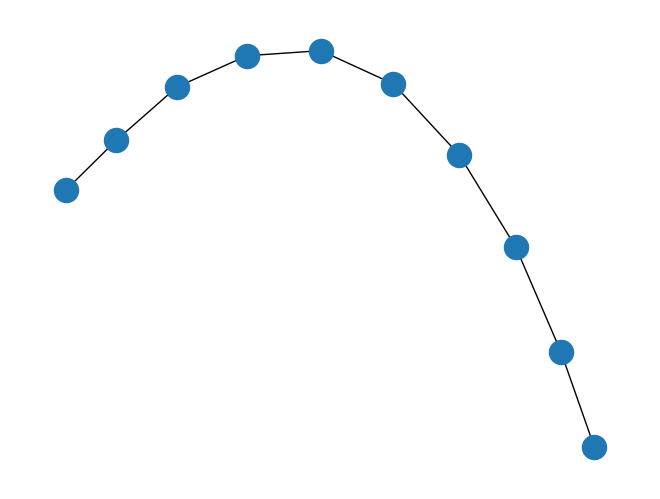

In [14]:
nx.draw(G)

In [17]:
import itertools
G = nx.path_graph(8)
k = 2
comp = nx.community.girvan_newman(G)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))

# ([0, 1, 2, 3], [4, 5, 6, 7])
# ([0, 1], [2, 3], [4, 5, 6, 7])

([0, 1, 2, 3], [4, 5, 6, 7])
([0, 1], [2, 3], [4, 5, 6, 7])


([0, 1], [2, 3], [4, 5, 6, 7])

In [ ]:
# https://networkx.org/documentation/stable/auto_examples/algorithms/plot_girvan_newman.html
# Load karate graph and find communities using Girvan-Newman
G = nx.karate_club_graph()
communities = list(nx.community.girvan_newman(G))

# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)


In [ ]:
nx.draw(G)

In [ ]:
communities

In [ ]:

# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors


# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )


In [ ]:


fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[3], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()